# 处理无标签数据 - 聚类分析

- 使用流行的k-means算法寻找相似性中心
- 使用自下而上的方法构建分层集群树
- 使用基于密度的聚类方法识别任意形状的对象

## 使用k-means以相似性分组对象

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)


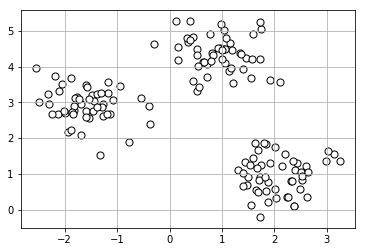

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', s=50, edgecolors='black')
plt.grid()
plt.show()


k-means 4步骤

1. 从样本点中随机选取k个点作为起始聚类中心
2. 分配每个样本距离最近的中心
3. 将中心点移动到所有属于该中心的样本的中心
4. 重复2和3,直到聚类分配不再改变,或达到用户容忍的范围,或达到最大遍历次数. 

In [7]:
from sklearn.cluster import KMeans
# n_init=10 mean that run the k-means clustering algorithms 10 times independently with different random
# centroids to choose the final model as the one with the lowest SSE.
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)


### K-means++

[definition and more details see this.](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

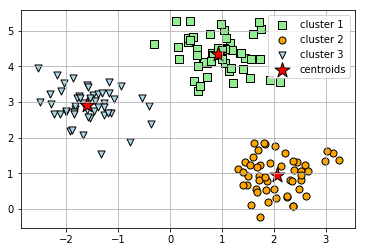

In [9]:
# 可视化
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolors='black', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolors='black', marker='o', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', edgecolors='black', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250,
            marker='*', c='red', edgecolors='black', label='centroids')
plt.legend()
plt.grid()


### 硬聚类 vs 软聚类

FCM是一种软聚类方法,和k-means有些类似,但是没有在sklearn中实现,不过实践发现,FCM和k-means的效果差不多.

见[Comparative Analysis of k-means and Fuzzy c-means Algorithms](https://www.researchgate.net/publication/270953555_Comparative_Analysis_of_K-Means_and_Fuzzy_C-Means_Algorithms)

### 使用elbow方法找到最佳的聚类数

In [11]:
# SSE
print('Distortion: {:.2f}'.format(km.inertia_))


Distortion: 72.48


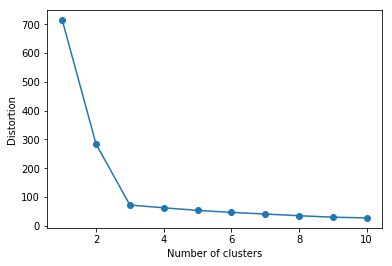

In [12]:
# 画出elbow方法画出k的大小与SSE(distortion)的关系
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


可以看出k=3是个好的选择

### 通过silhouette图来量化聚类的性能

In [13]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)


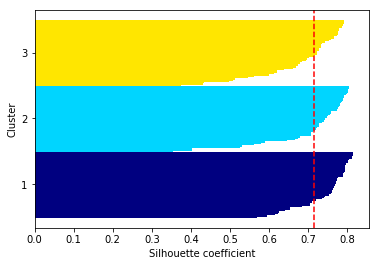

In [15]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silouette_avg = np.mean(silouette_vals)
plt.axvline(silouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()


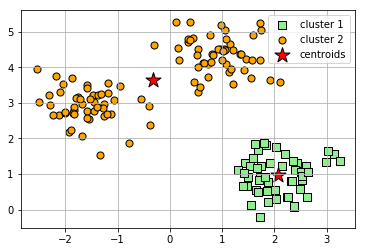

In [17]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolors='black', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolors='black', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250,
            marker='*', c='red', edgecolors='black', label='centroids')
plt.legend()
plt.grid()


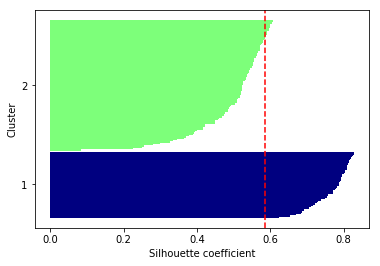

In [18]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silouette_avg = np.mean(silouette_vals)
plt.axvline(silouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## 将群集组织为分层树

- Compute the distance matrix of all samples.
- Represent each data point as a singleton cluster.
- Merge the two closest clusters based on the distance of the most dissimilar(distant) members.
- Update the distance matrix.
- Repeat steps 2 to 4 until one single cluster remains.

In [20]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 在距离矩阵上实施分层聚类

In [22]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [27]:
from scipy.cluster.hierarchy import linkage
linkage?

Signature: linkage(y, method='single', metric='euclidean', optimal_ordering=False)
Docstring:
Perform hierarchical/agglomerative clustering.

The input y may be either a 1d condensed distance matrix
or a 2d array of observation vectors.

If y is a 1d condensed distance matrix,
then y must be a :math:`\binom{n}{2}` sized
vector where n is the number of original observations paired
in the distance matrix. The behavior of this function is very
similar to the MATLAB linkage function.

A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
:math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
cluster with an index less than :math:`n` corresponds to one of
the :math:`n` original observations. The distance between
clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
fourth value ``Z[i, 3]`` represents the number of original
observations in the newly formed cluster.

The following linkage methods are used to compute 

In [26]:
# incorrect aproach
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(row_dist, method='complete', metric='euclidean')


D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# correct approach
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')


In [29]:
# correct approach
row_clusters = linkage(df.values, method='complete', metric='euclidean')


In [31]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster {}'.format(i+1) for i in range(row_clusters.shape[0])])


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


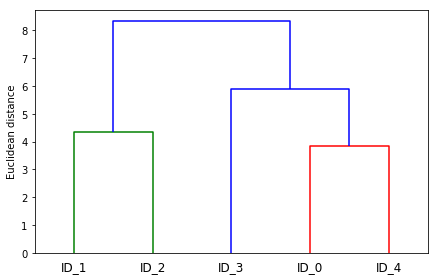

In [32]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()


### 将树状图附加到热图上

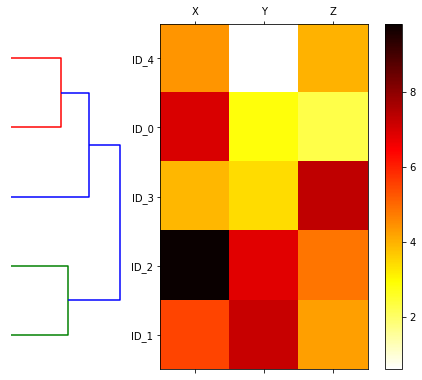

In [41]:
# 1.旋转90°
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='right')

# 2.
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# 3.
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

# 4.
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()


### 应用凝聚聚类

In [42]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: {} '.format(labels))


Cluster labels: [0 1 1 0 0] 


## 通过DBSCAN定位高密度区域

__Density-based Spatial Clustering of Applications with Noise (DBSCAN)__

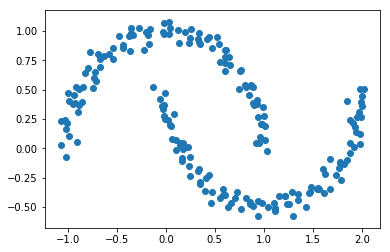

In [44]:
# 通过一个半月形结构的数据集来比较k-means,分层和DBSCAN聚类
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()


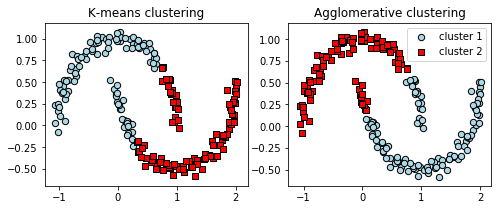

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', marker='o', s=40, label='cluster 1', edgecolor='black')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', marker='s', s=40, label='cluster 2', edgecolor='black')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue', marker='o', s=40, label='cluster 1', edgecolor='black')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red', marker='s', s=40, label='cluster 2', edgecolor='black')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

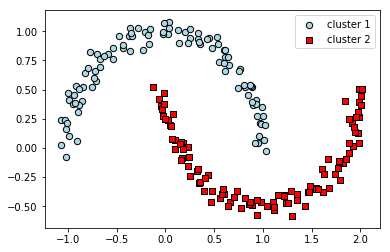

In [53]:
# 试试DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = dbscan.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='lightblue', marker='o', s=40, label='cluster 1', edgecolor='black')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='red', marker='s', s=40, label='cluster 2', edgecolor='black')
plt.legend()
plt.show()
